Everyone goes to the mall, but not everyone spends at the mall. Some are just window shopping while others go on a mass shopping expedition.

Information on customers' gender, age, annual income and spending score was gathered to identify clusters within them to better serve them. The mall may also use this data to develop a marketing strategy!

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("ticks")

Let's take a look at the raw data:

In [2]:
df=pd.read_csv("../input/customer-segmentation-tutorial-in-python/Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Drop the "CustomerID" column as it does not provide any insight to the clusters:

In [3]:
df.drop(["CustomerID"],axis=1,inplace=True)

Change the "Gender" column to binary:

In [4]:
df["Gender"]=pd.get_dummies(df["Gender"],drop_first=True)
#where 0=female and 1=male

Now let's check the data:

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Gender                  200 non-null    uint8
 1   Age                     200 non-null    int64
 2   Annual Income (k$)      200 non-null    int64
 3   Spending Score (1-100)  200 non-null    int64
dtypes: int64(3), uint8(1)
memory usage: 5.0 KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Gender,200.0,0.44,0.497633,0.0,0.00,0.0,1.0,1.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.0,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.0,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.0,99.0


In [7]:
df.isnull().sum()
#no missing data, which is good

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

OK this is what the working dataset looks like:

In [8]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


Text(0.5, 1.0, 'Customer Spending Distribution')

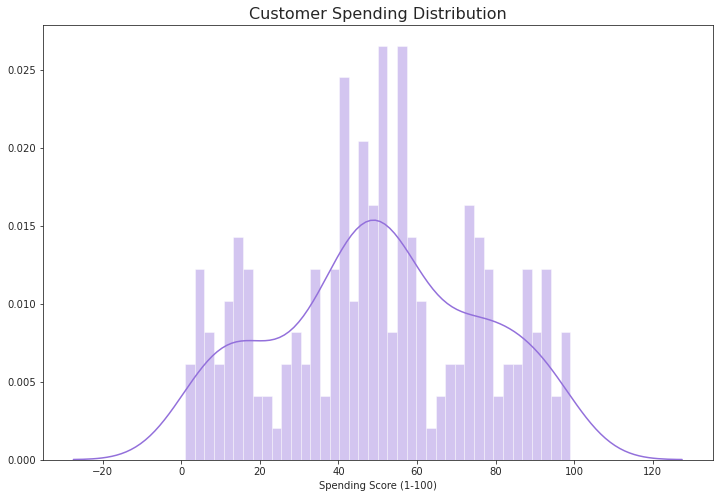

In [9]:
fig=plt.figure(figsize=(12,8))
sns.distplot(a=df["Spending Score (1-100)"],bins=40,color="mediumpurple")
plt.title("Customer Spending Distribution",size=16)

* Majority of the customers have a spending score of between 40 and 60, then again between 0 and 20 & 70 and 100.

Text(0.5, 1.01, 'Gender Distribution')

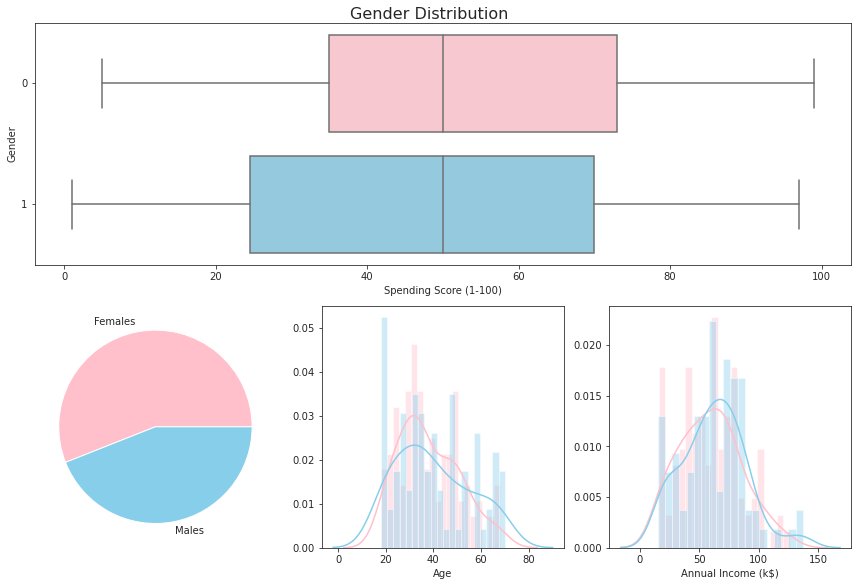

In [10]:
fig=plt.figure(figsize=(12,8))

ax1=plt.subplot2grid((2,3),(0,0),colspan=3)
ax2=plt.subplot2grid((2,3),(1,0))
ax3=plt.subplot2grid((2,3),(1,1))
ax4=plt.subplot2grid((2,3),(1,2))

sns.boxplot(x=df["Spending Score (1-100)"],y=df["Gender"],orient="h",palette={0:"pink",1:"skyblue"},ax=ax1)

ax2.pie(df["Gender"].value_counts(),colors=["pink","skyblue"],labels=["Females","Males"])

sns.distplot(a=df["Age"].loc[(df["Gender"]==0)],bins=20,color="pink",ax=ax3)
sns.distplot(a=df["Age"].loc[(df["Gender"]==1)],bins=20,color="skyblue",ax=ax3)

sns.distplot(a=df["Annual Income (k$)"].loc[(df["Gender"]==0)],bins=20,color="pink",ax=ax4)
sns.distplot(a=df["Annual Income (k$)"].loc[(df["Gender"]==1)],bins=20,color="skyblue",ax=ax4)

plt.tight_layout(pad=1,h_pad=1,w_pad=1)
plt.suptitle("Gender Distribution",y=1.01,size=16)

* Although they share the same median spending score, females spend slightly more than males.
* There are more females in the customer pool than males with most females being aged between 30 and 40.
* Not much disparity in annual income between the sexes.

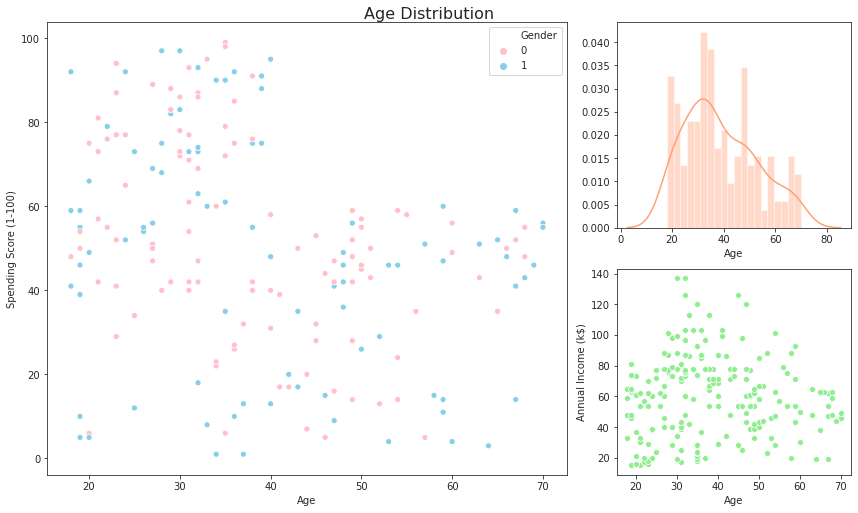

In [11]:
fig=plt.figure(figsize=(12,7))

ax1=plt.subplot2grid((2,3),(0,0),colspan=2,rowspan=2)
ax2=plt.subplot2grid((2,3),(0,2))
ax3=plt.subplot2grid((2,3),(1,2))

sns.scatterplot(x=df["Age"],y=df["Spending Score (1-100)"],hue=df["Gender"],palette={0:"pink",1:"skyblue"},ax=ax1)

sns.distplot(a=df["Age"],bins=20,color="lightsalmon",ax=ax2)

sns.scatterplot(x=df["Age"],y=df["Annual Income (k$)"],color="lightgreen",ax=ax3)

plt.suptitle("Age Distribution",y=1.01,size=16)
plt.tight_layout(pad=1,h_pad=1,w_pad=1)

* People younger than 40 tend to spend more than those older than 40; and more customers younger than 40.
* No relationship between age and annual income, so those younger than 40 are not necessarily earning more but just have more disposable income.

Text(0.5, 0.93, 'Annual Income Distribution')

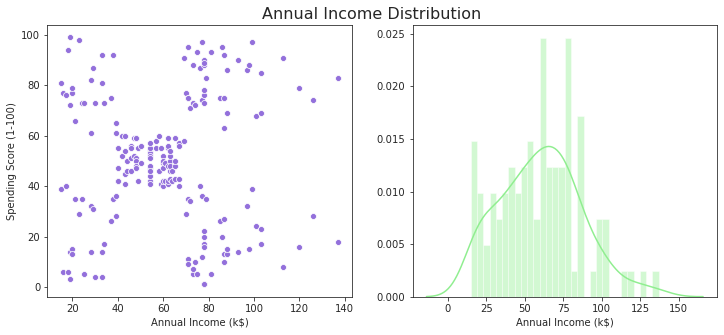

In [12]:
fig=plt.figure(figsize=(12,5))

ax1=fig.add_subplot(1,2,1)
ax2=fig.add_subplot(1,2,2)

sns.scatterplot(x=df["Annual Income (k$)"],y=df["Spending Score (1-100)"],color="mediumpurple",ax=ax1)

sns.distplot(a=df["Annual Income (k$)"],bins=30,color="lightgreen",ax=ax2)

plt.suptitle("Annual Income Distribution",y=0.93,size=16)

* Those with an annual income of less than 40,000 either spend less or more, but not average.
* Those with an annual income of between 40,000 and 70,000 spend the average amount.
* And those with an annual income of more than 70,000 again either spend less or more, but not average.

Before going further with clustering, it is important to ensure there are no biases and so the data must be scaled:

In [13]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_df=pd.DataFrame(scaler.fit_transform(df),columns=df.columns)
scaled_df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.128152,-1.424569,-1.738999,-0.434801
1,1.128152,-1.281035,-1.738999,1.195704
2,-0.886405,-1.352802,-1.700830,-1.715913
3,-0.886405,-1.137502,-1.700830,1.040418
4,-0.886405,-0.563369,-1.662660,-0.395980


In [14]:
from sklearn.cluster import KMeans

KMeans requires us to indiate the number of clusters the algorithm should identify. So let's try looking for the elbow point in their inertia (remember the inertia is the sum of squared distances within the cluster - thus the smaller the inertia the better):

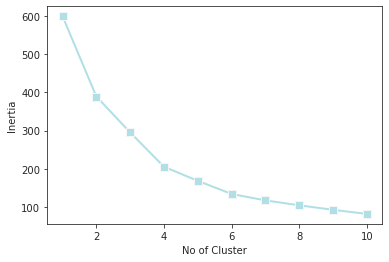

In [15]:
kinertia=[]

for i in range(1,11):
    kmodel=KMeans(n_clusters=i)
    kmodel.fit(scaled_df.drop(["Gender"],axis=1))
    kinertia.append(kmodel.inertia_)

kinertia_df=pd.DataFrame({"No of Cluster":range(1,11),"Inertia":kinertia})

sns.lineplot(x=kinertia_df["No of Cluster"],y=kinertia_df["Inertia"],color="powderblue",linewidth=2,marker="s",markersize=8,markeredgecolor="whitesmoke",markeredgewidth=1)

The optimal number of clusters using their inertia is not very clear so let's compare this to their silhouette scores (remember the silhouette coefficient measures how close each point in a cluster is to the points in its neighbouring clusters - thus the closer the value to +1 the better):

In [16]:
from sklearn.metrics import silhouette_score

Text(0, 0.5, 'Silhouette Score')

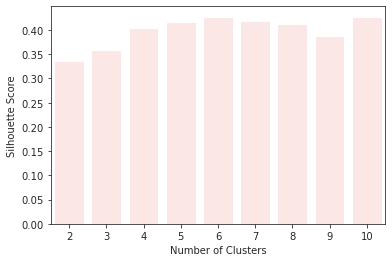

In [17]:
ksilhouette=[]

for j in range(2,11):
    kmodel=KMeans(n_clusters=j)
    kpredict=kmodel.fit_predict(scaled_df.drop(["Gender"],axis=1))
    kscores=silhouette_score(scaled_df.drop(["Gender"],axis=1),kpredict)
    ksilhouette.append(kscores)

silhouette_df=pd.DataFrame({"no_k":list(range(2,11)),"silhoutte":ksilhouette})

sns.barplot(x=silhouette_df["no_k"],y=silhouette_df["silhoutte"],color="mistyrose")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")

Optimal number of clusters should be 6!

In [18]:
model=KMeans(n_clusters=6,random_state=7)
model.fit(scaled_df)
df["Cluster"]=model.labels_

Now we can examine our 6 mall customer clusters:

In [19]:
cluster_df=df.groupby(["Cluster"]).mean().T
cluster_df["Average"]=df.apply(lambda x:x.mean(),axis=0)
cluster_df

Cluster,0,1,2,3,4,5,Average
Gender,0.076923,1.000000,0.000000,0.826087,0.000000,1.000000,0.44
Age,32.923077,28.410256,25.945946,39.043478,49.914894,57.214286,38.85
Annual Income (k$),89.807692,58.230769,42.216216,90.608696,54.255319,46.785714,60.56
Spending Score (1-100),76.961538,70.717949,57.459459,15.391304,36.531915,38.714286,50.20


Cluster 0: relatively young cluster with a high annual income and correspondingly high spending score (the highest spending score).

Cluster 1: second youngest cluster with a slightly lower than average annual income who spends more than their annual income, more than the average spending score.

Cluster 2: the youngest cluster with the lowest annual income spending who again spends more than their annual income, more than the average spending score.

Cluster 3: average aged cluster with the highest annual income but lowest spending score.

Cluster 4: second oldest cluster with a slightly lower than average annual income with a medium spending score.

Cluster 5: the oldest cluster with the second lowest annual income with a medium spending score.

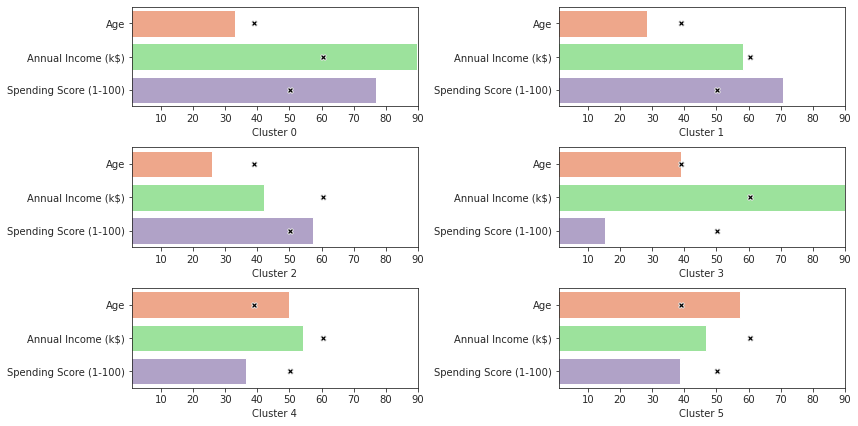

In [20]:
cluster_df_graphing=cluster_df.drop(["Gender"])

fig,ax=plt.subplots(3,2,figsize=(12,6))

for i,ax in enumerate(ax.flat):
    sns.scatterplot(x=cluster_df_graphing["Average"],y=cluster_df_graphing.index,marker="X",color="k",ax=ax)
    sns.barplot(x=cluster_df_graphing[i],y=cluster_df_graphing.index,palette={"Age":"lightsalmon","Annual Income (k$)":"lightgreen","Spending Score (1-100)":"#AE9CCD"},ax=ax)
    ax.set_xlim(1,90)
    plt.setp(ax.collections,zorder=100)
    ax.set_xlabel("Cluster {}".format(i))
    
plt.tight_layout(pad=1,h_pad=1,w_pad=1)    

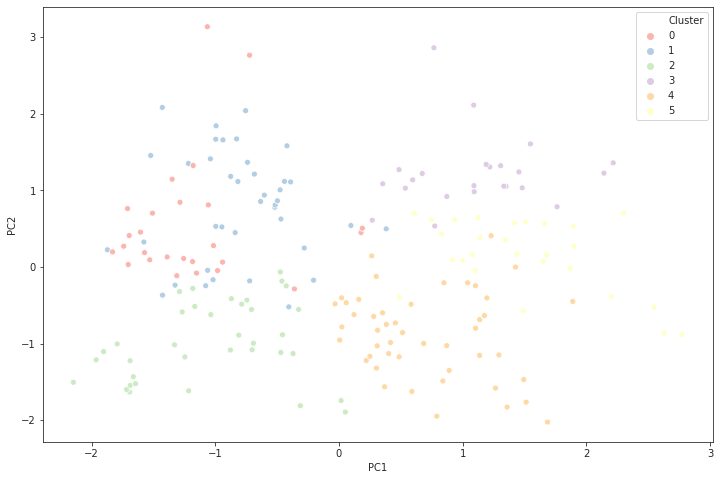

In [21]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)

pca_df=pd.DataFrame(pca.fit_transform(scaled_df),columns=["PC1","PC2"])
pca_df["Cluster"]=model.labels_

plt.figure(figsize=(12,8))
sns.scatterplot(x=pca_df["PC1"],y=pca_df["PC2"],hue=pca_df["Cluster"],palette="Pastel1")